<a href="https://colab.research.google.com/github/an-pk-chu/Thera-Bank-Loan-Data-Analysis/blob/main/Bank_Loan_Dataset_Clean_the_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


**Dataset Overview**

**Comment**:

The file "bank_loan.csv" contains data on 5,000 customers, including demographic information (such as age and income), details about the customer's relationship with the bank (e.g., mortgage, securities account), and their response to a previous personal loan campaign (indicated by "Personal Loan"). Out of these 5,000 customers, only 480 (or 9.6%) accepted the personal loan offered in the earlier campaign.

The dataset has no missing (NaN) values. It includes a combination of numerical and categorical attributes, with all categorical data represented numerically.

In [ ]:
# open the dataset
df = pd.read_csv('bank_loan (1).csv')
df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


According to above information:
 - Dataset has 5000 datapoints.
 - Dataset has 14 columns including:
   - 13 columns by int64 type: `ID`, `Age`, `Experience`, `Income`, `ZIP Code`, `Family`, `Education`, `Moragage`, `Personal Loan`, `Securities Account`, `CD Account`, `Online` and `CreditCard`
   - 1 column by object type: `CCAvg`
 - Target is `Personal Loan` column and other columns are features.
 - It seems that there is no missing value, but there may be invalid values, so we will check this case further.


**Clean the Dataset**

In [ ]:
# Clean the dataset by removing unnecessary columns
df.drop(columns=['ID', 'ZIP Code'], inplace=True)



In [ ]:
#The / signs in column CCAvg indicate decimal values, so we change the datatype of the column to float
df['CCAvg'] = df['CCAvg'].str.replace('/', '.').astype(float)
df.head()



,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
pd.set_option('display.max_rows', 20) # for show all rows
round(df.describe().T, 2)


,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.34,11.46,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.10,11.47,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.77,46.03,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.40,1.15,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.88,0.84,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.50,101.71,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.10,0.29,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.10,0.31,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.06,0.24,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Experience has min value of <0, which is illogical. Detect abnormal data
df[df['Experience'] < 0]


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4411,23,-2,75,2,1.80,2,0,0,0,0,1,1
4481,25,-2,35,4,1.00,3,0,0,0,0,1,0
4514,24,-3,41,4,1.00,3,0,0,0,0,1,0
4582,25,-1,69,3,0.30,3,0,0,0,0,1,0


In [ ]:
# convert these values to positive ones
df['Experience'] = df['Experience'].abs()
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
# check if there is any missing values
df.isnull().sum()


,0
Age,0
Experience,0
Income,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0
Securities Account,0
CD Account,0


In [ ]:
# check invalid values
df.nunique()

,0
Age,45
Experience,44
Income,162
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal Loan,2
Securities Account,2
CD Account,2


In [ ]:
# Check value counts of columns that appear categorical according to above results
discrete_cols1 = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in discrete_cols1:
    print(f"{col}:\n{df[col].value_counts()}")
    print('-' * 50)


Family:
Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64
--------------------------------------------------
Education:
Education
1    2096
3    1501
2    1403
Name: count, dtype: int64
--------------------------------------------------
Personal Loan:
Personal Loan
0    4520
1     480
Name: count, dtype: int64
--------------------------------------------------
Securities Account:
Securities Account
0    4478
1     522
Name: count, dtype: int64
--------------------------------------------------
CD Account:
CD Account
0    4698
1     302
Name: count, dtype: int64
--------------------------------------------------
Online:
Online
1    2984
0    2016
Name: count, dtype: int64
--------------------------------------------------
CreditCard:
CreditCard
0    3530
1    1470
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
# no invalid values were detected

In [ ]:
#check for duplicate data
df.duplicated().sum()

13

In [ ]:
#handle duplicated data
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

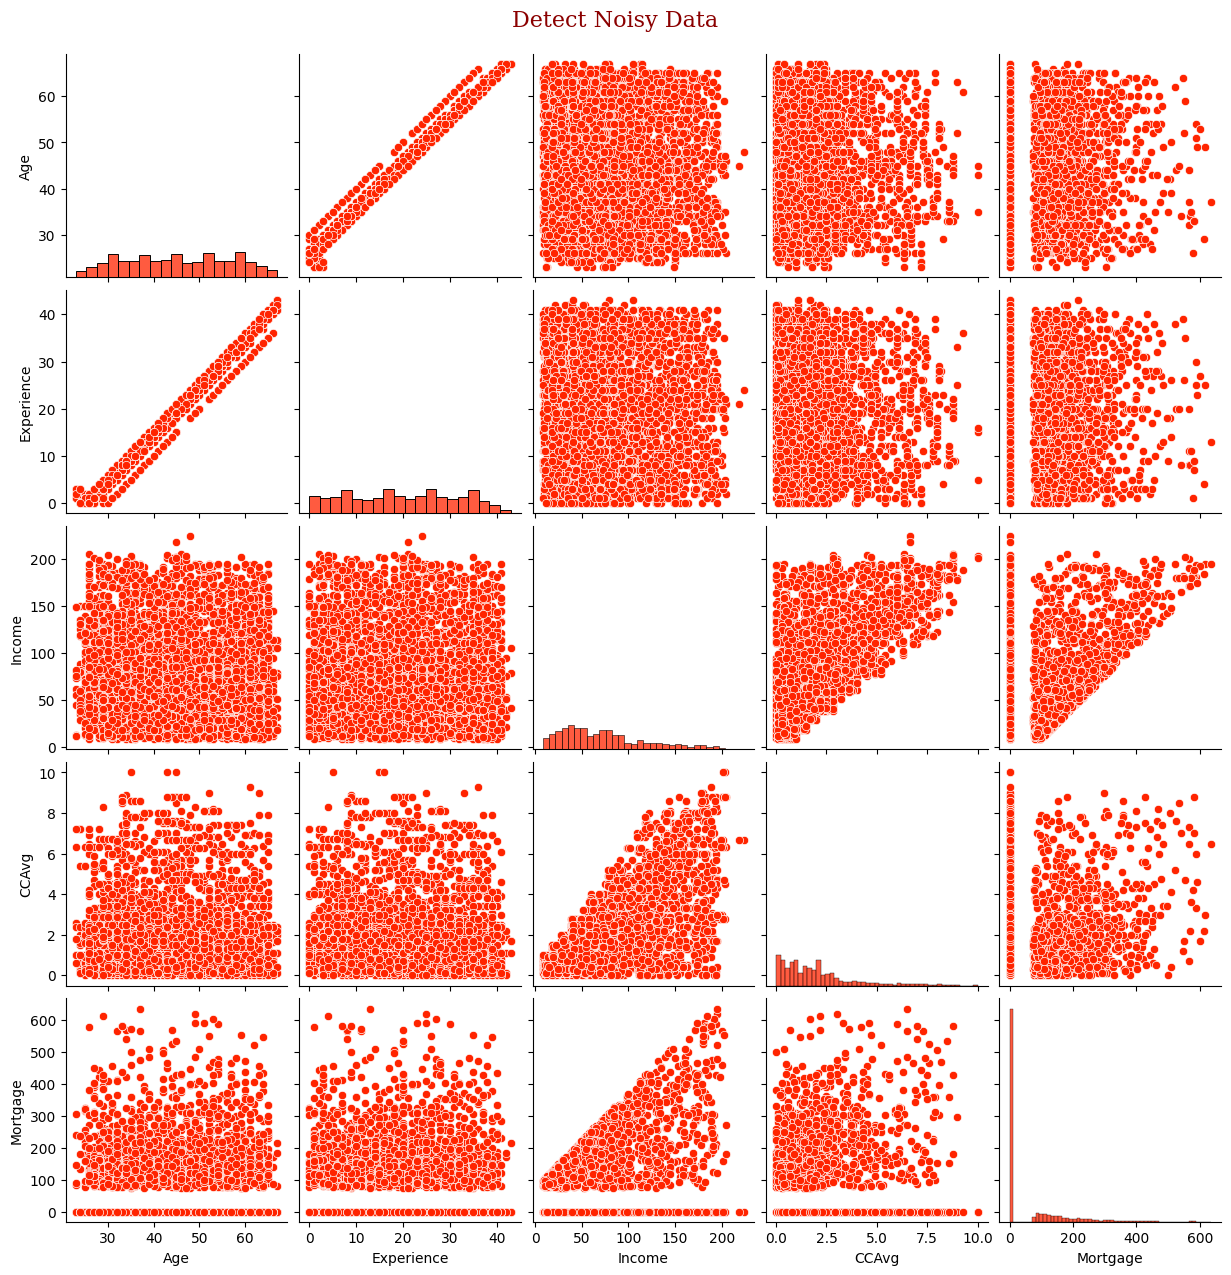

In [ ]:
# check for noisy data
import seaborn as sns
import matplotlib.pyplot as plt
FONT = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
%matplotlib inline
sns.set_palette('autumn')
dnp = sns.pairplot(df.loc[:, ~df.columns.isin(discrete_cols1)])
dnp.fig.suptitle('Detect Noisy Data', y=1.02, **FONT)


plt.show()

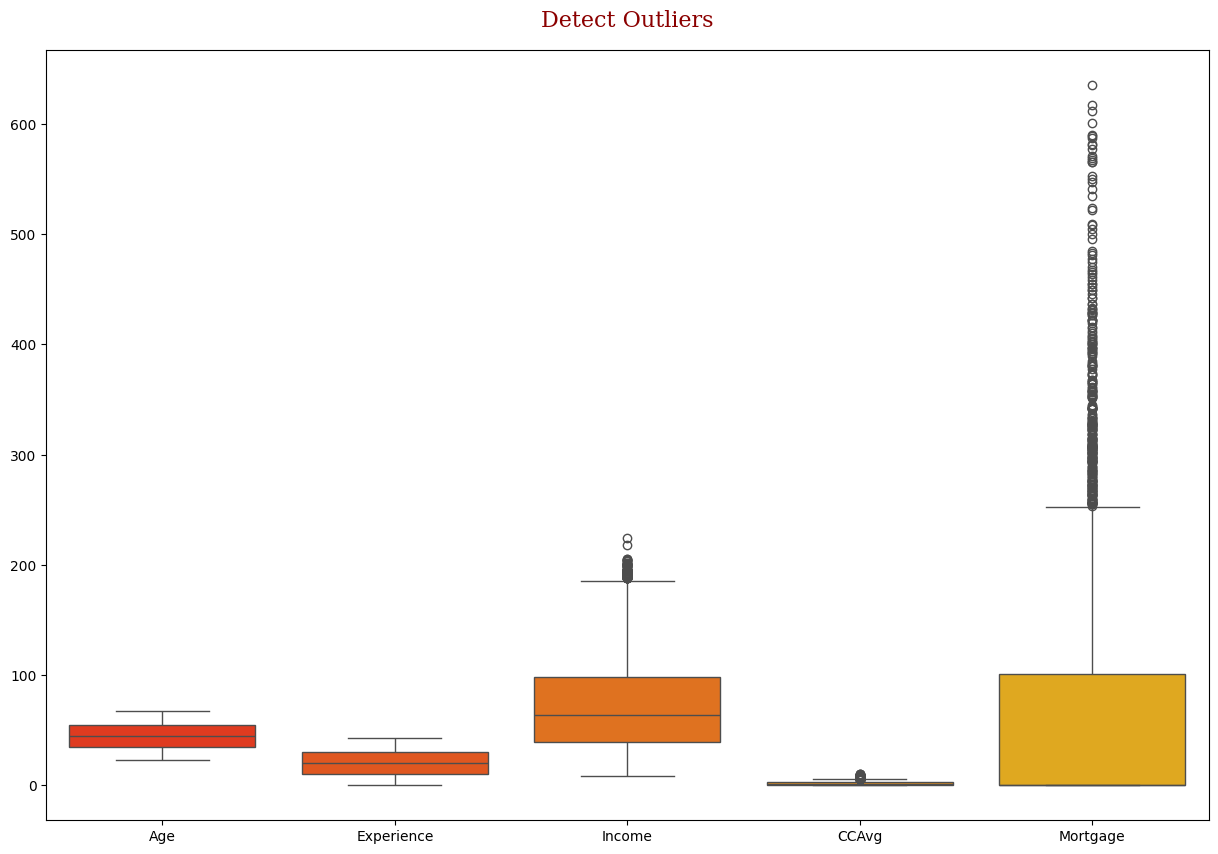

In [ ]:
# Visualize outliers for all columns with boxplots
fig = plt.figure(figsize=(15, 10))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('autumn')
dnp = sns.boxplot(data=df.loc[:, ~df.columns.isin(discrete_cols1)])
dnp.set_title('Detect Outliers', y=1.02, **FONT)

plt.show()







An outlier is an observation that differs significantly from the others, as seen in some of the boxplots for certain columns. However, it's important to remember that **outliers are innocent until proven guilty**. This means they should not be removed unless there is a valid reason. Based on the pairplot, there doesn't seem to be any noisy data, so no data will be deleted.

Everything appears to be in order, but for more convenient analysis, we will convert the annual income to a monthly figure. This is because the "Income" column represents annual income, while the "CCAvg" column represents average monthly spending on credit cards.  

In [ ]:
# convert annual income to monthly
df['Income'] = round(df['Income']/12, 2)
df


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.08,4,1.6,1,0,0,1,0,0,0
1,45,19,2.83,3,1.5,1,0,0,1,0,0,0
2,39,15,0.92,1,1.0,1,0,0,0,0,0,0
3,35,9,8.33,1,2.7,2,0,0,0,0,0,0
4,35,8,3.75,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,3.33,1,1.9,3,0,0,0,0,1,0
4996,30,4,1.25,4,0.4,1,85,0,0,0,1,0
4997,63,39,2.00,2,0.3,3,0,0,0,0,0,0
4998,65,40,4.08,3,0.5,2,0,0,0,0,1,0


In [ ]:
#import the processed data to google drive
df.to_csv('bank_loan_processed.csv', index=False)


In [ ]:
# summarize the data
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000
mean,45.347704,20.144576,6.152107,2.396631,1.940630,1.879286,56.646080,0.096250,0.104672,0.060557,0.596150,0.294566
std,11.460838,11.411959,3.838648,1.147510,1.748824,0.839667,101.805341,0.294964,0.306161,0.238541,0.490717,0.455893
min,23.000000,0.000000,0.670000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,3.250000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,5.330000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,8.170000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,18.670000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000
